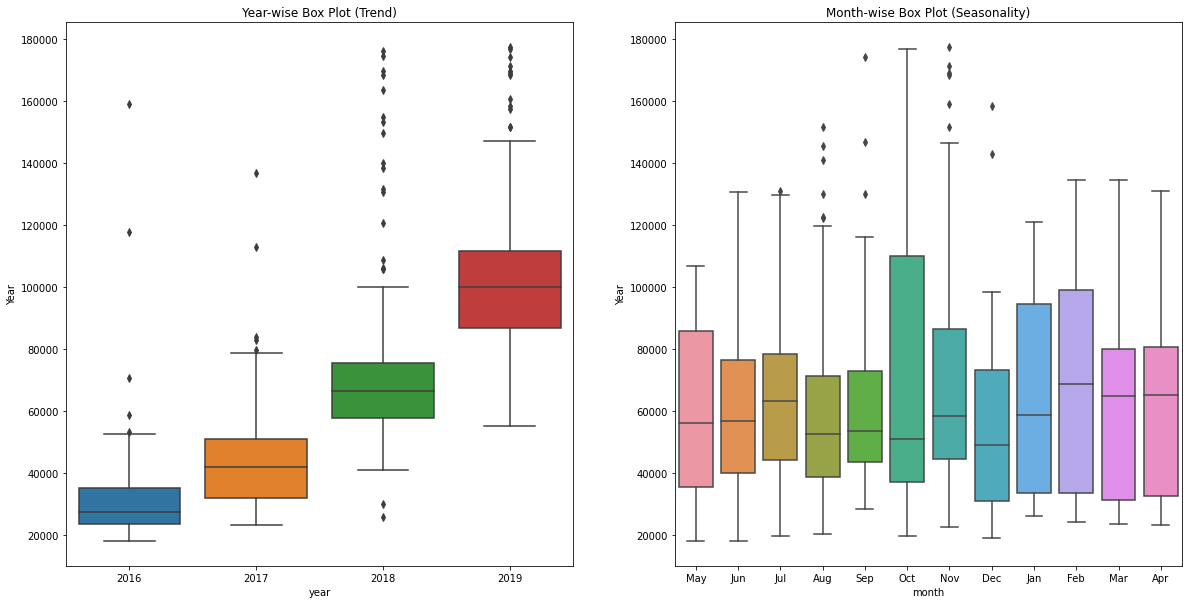

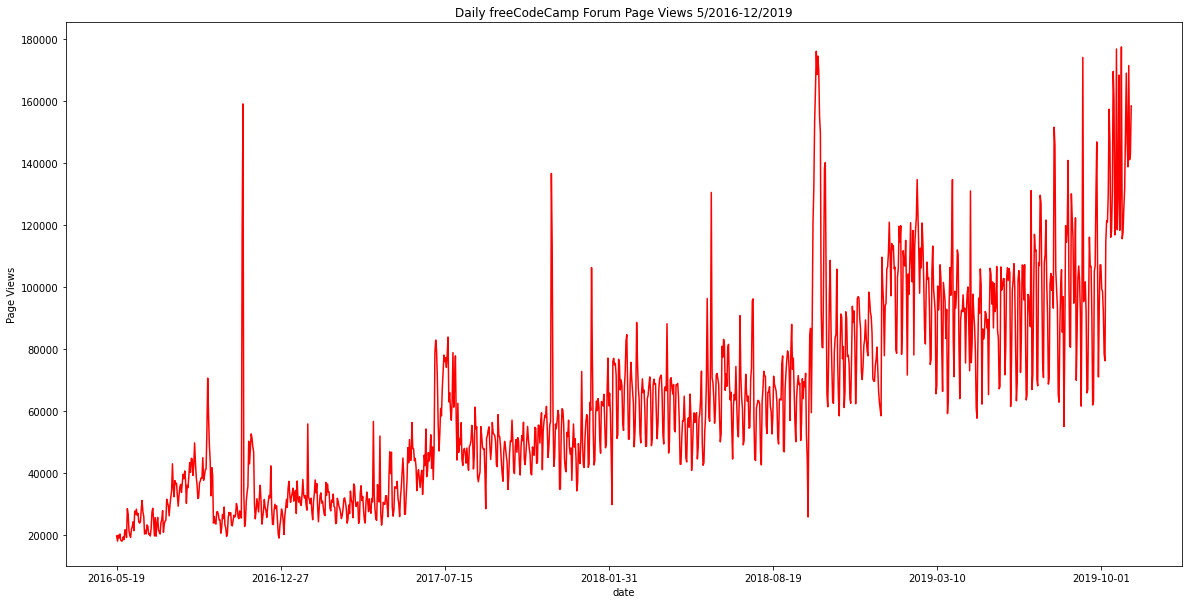

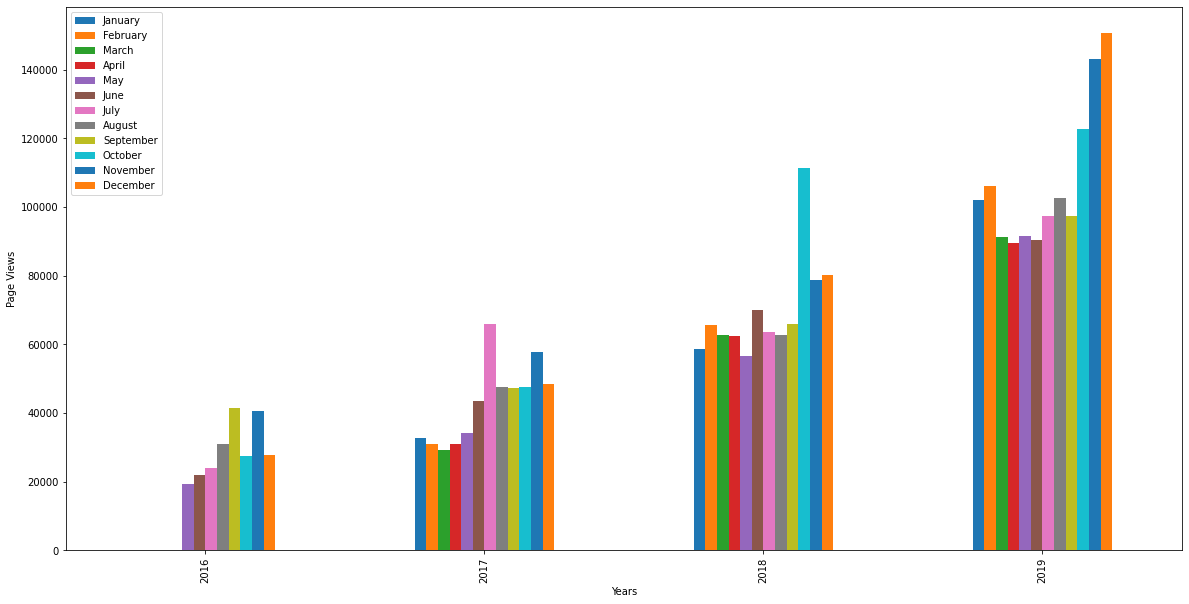

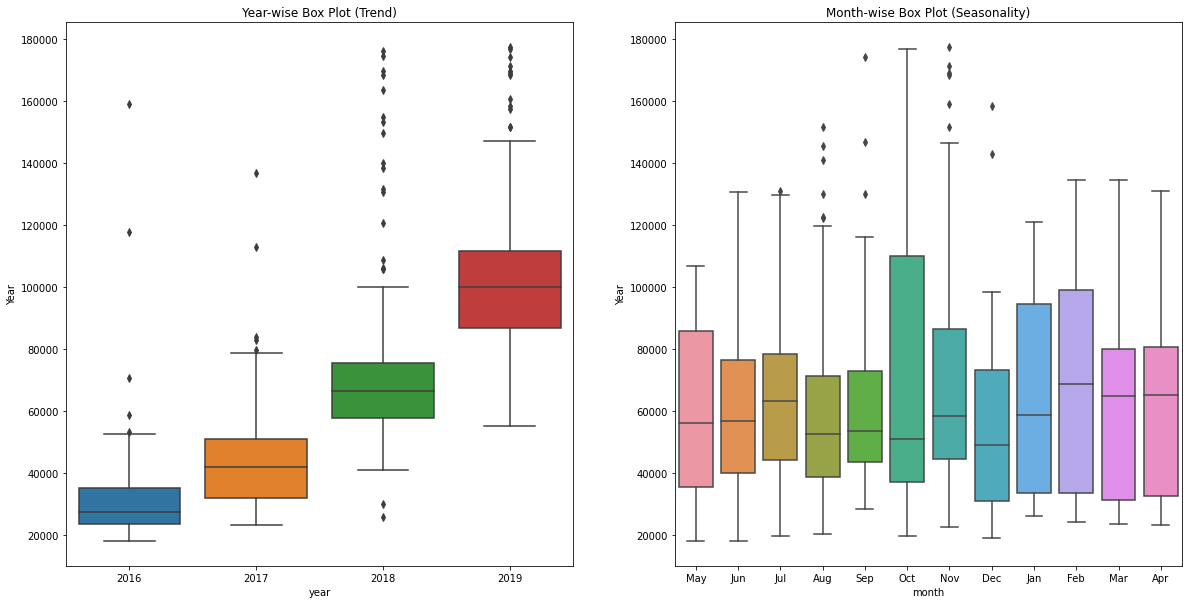

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv').set_index('date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025))&(df['value'] <= df['value'].quantile(0.975))].rename(columns={'value': 'Page Views'})

def draw_line_plot():
    # Draw line plot
    fig, axes = plt.subplots(figsize=(20, 10))
    df.plot(kind="line", ax=axes,
            title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
            ylabel="Page Views", color='red',
           legend=False)
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["month"]= pd.DatetimeIndex(df_bar.index).month
    df_bar["year"]= pd.DatetimeIndex(df_bar.index).year
    months = ['January', 'February', 'March', 'April' , 'May' , 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_bar_grouped = df_bar.groupby(["year","month"])["Page Views"].mean().unstack()

    # Draw bar plot
    fig, axes = plt.subplots(figsize=(20, 10))
    df_bar_grouped.plot(kind='bar', ax=axes, 
                        ylabel="Page Views", xlabel="Years")
    plt.legend(labels=months)




    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    #This is another way of extracting date info (if the datatype is datetime)
    df_box['date'] = pd.to_datetime(df_box['date'])
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # Draw box plots (using Seaborn)
    fig , axes = plt.subplots(figsize=(20, 10), ncols=2, sharex=False)
    ax1 = sns.boxplot(x='year',y='Page Views',data=df_box, ax = axes[0])
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_ylabel("Year")
    
    ax2 = sns.boxplot(x="month", y="Page Views", data=df_box, ax = axes[1])
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_ylabel("Year")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


draw_line_plot()
draw_bar_plot()
draw_box_plot()